In [1]:
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import PIL
import cv2
import os
from keras.utils import np_utils
from keras.preprocessing import image
from sklearn.datasets import load_files
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.


In [2]:
path_to_train_folder = os.path.join(os.path.pardir, "data", "train_images")
path_to_test_folder = os.path.join(os.path.pardir, "data", "test_images")
path_to_validation_folder = os.path.join(os.path.pardir, "data", "valid_images")

In [3]:
#function to laod data from given path
def load_dataset(path):
    data = load_files(path)
    doc_files = np.array(data['filenames'])
    doc_targets = np_utils.to_categorical(np.array(data['target']), 16)
    return doc_files, doc_targets

In [4]:
#Load data from filepaths
train_files, train_targets = load_dataset(path_to_train_folder)
valid_files, valid_targets = load_dataset(path_to_validation_folder)
test_files, test_targets = load_dataset(path_to_test_folder)

In [5]:
#check the dataset
print('There are %s total doc images.\n' % len(np.hstack([train_files, valid_files])))
print('There are %d training doc images.' % len(train_files))
print('There are %d validation doc images.' % len(valid_files))
print('There are %d test doc images.'% len(test_files))

There are 4800 total doc images.

There are 3200 training doc images.
There are 1600 validation doc images.
There are 1600 test doc images.


In [6]:
#function that converts image into 4D array to facilitate Keras CNN
def convert_4darray(img_path):
    # loads RGB image
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [7]:
#fucntion which converts all images in given path to 4D array for Keras CNN
def convert_4darrays(img_paths):
    list_of_tensors = [convert_4darray(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [8]:
#pre-process the data for Keras
train_tensors = convert_4darrays(train_files).astype('float32')/255
test_tensors = convert_4darrays(test_files).astype('float32')/255
valid_tensors = convert_4darrays(valid_files).astype('float32')/255

100%|██████████| 1600/1600 [00:35<00:00, 45.08it/s]


In [12]:
#Model CNN
model = Sequential()
# Conv layer 1
model.add(Conv2D(32, (5, 5), strides=(1, 1), use_bias=False, padding='same', activation='relu', input_shape=(224, 224, 3)))
# max pooling layer 1
model.add(MaxPooling2D(pool_size=(3, 3), strides=3))

# Conv layer 2
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
# Mac pooling layer 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=3))

# Conv layer 3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Max pooling layer 3
model.add(MaxPooling2D(pool_size=(3, 3), strides=3))

# Conv layer 4
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

# COnv layer 5
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Max pooling layer 4
model.add(MaxPooling2D(pool_size=(3, 3), strides=3))

# Flatten layer 1
model.add(Flatten())
model.add(Dense(32, activation='relu'))
# Flatter layer 2
model.add(Dense(32, activation='relu'))
# Predictions
model.add(Dense(16, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      2400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)         

In [21]:
EPOCHS = 50
# Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['accuracy'])
# Fit the model
fit_model = model.fit(train_tensors, train_targets,epochs=EPOCHS, validation_split=0.33, batch_size=64,verbose=2)
# Get index of predicted document for each image in test set
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
# Test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Train on 1072 samples, validate on 528 samples
Epoch 1/10
1072/1072 [==============================] - ETA: 1:03 - loss: 0.0537 - accuracy: 0.15 - ETA: 49s - loss: 0.0541 - accuracy: 0.1797 - ETA: 39s - loss: 0.0540 - accuracy: 0.182 - ETA: 33s - loss: 0.0542 - accuracy: 0.195 - ETA: 29s - loss: 0.0542 - accuracy: 0.190 - ETA: 26s - loss: 0.0538 - accuracy: 0.203 - ETA: 23s - loss: 0.0534 - accuracy: 0.203 - ETA: 20s - loss: 0.0535 - accuracy: 0.203 - ETA: 17s - loss: 0.0532 - accuracy: 0.206 - ETA: 15s - loss: 0.0533 - accuracy: 0.201 - ETA: 12s - loss: 0.0534 - accuracy: 0.203 - ETA: 10s - loss: 0.0536 - accuracy: 0.200 - ETA: 8s - loss: 0.0534 - accuracy: 0.206 - ETA: 5s - loss: 0.0532 - accuracy: 0.21 - ETA: 3s - loss: 0.0532 - accuracy: 0.21 - ETA: 1s - loss: 0.0532 - accuracy: 0.21 - 43s 41ms/step - loss: 0.0531 - accuracy: 0.2192 - val_loss: 0.0559 - val_accuracy: 0.2102
Epoch 2/10
1072/1072 [==============================] - ETA: 33s - loss: 0.0549 - accuracy: 0.218 - ETA: 31s 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


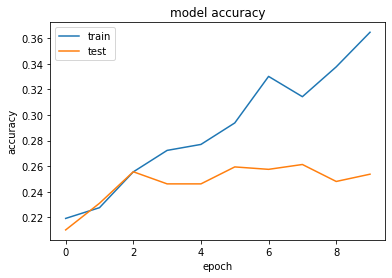

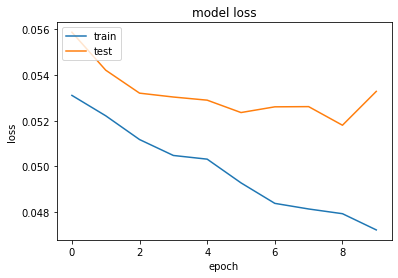

In [22]:
# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()